In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for 2D visulization
import seaborn as sns # for 2D visulization
from scipy import stats # for statistics

from nltk.sentiment import SentimentIntensityAnalyzer # sentiment analysis
import nltk
import warnings #filtering our warnings

In [11]:
df = pd.read_csv('/loan_approval (Case Study B).csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved


In [17]:
df['loan_status'] = df['loan_status'].astype(str)
df['loan_status'] = df['loan_status'].str.strip()
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved


In [18]:
approved_df = df[df['loan_status'] == 'Approved']
approved_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
5,6,2,Graduate,No,2700000,10300000,10,736,1000000,0,6200000,3300000,Approved
12,13,5,Not Graduate,Yes,8400000,22000000,2,830,3800000,3900000,19900000,5400000,Approved
13,14,3,Not Graduate,No,1600000,6200000,18,636,3400000,700000,5300000,1400000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,3,Not Graduate,No,3100000,9800000,12,820,6400000,5200000,10900000,4400000,Approved
2125,2126,0,Graduate,Yes,6100000,14600000,18,645,14500000,200000,23000000,4600000,Approved
2126,2127,5,Graduate,Yes,7000000,26200000,12,896,13100000,6600000,23600000,5700000,Approved
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved


In [19]:
new_df = approved_df[['income_annum', 'loan_amount', 'loan_status']]
new_df

,income_annum,loan_amount,loan_status
2,9100000,31500000,Approved
4,500000,1600000,Approved
5,2700000,10300000,Approved
12,8400000,22000000,Approved
13,1600000,6200000,Approved
...,...,...,...
2123,3100000,9800000,Approved
2125,6100000,14600000,Approved
2126,7000000,26200000,Approved
2130,8800000,29300000,Approved


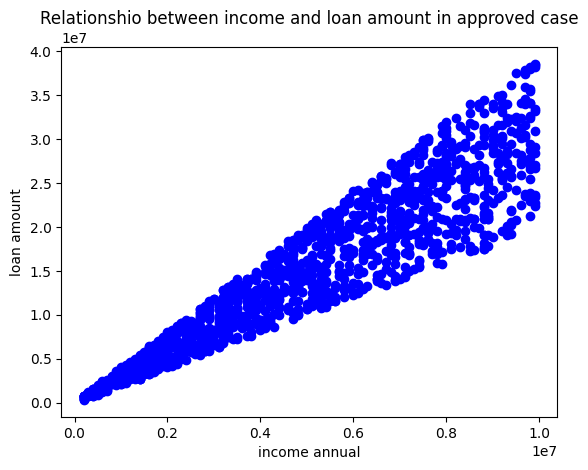

In [21]:
plt.scatter(new_df['income_annum'], new_df['loan_amount'], color='blue', marker='o')
plt.xlabel('income annual')  # Đặt tên trục x
plt.ylabel('loan amount')  # Đặt tên trục y
plt.title('Relationship between income and loan amount in approved case')  # Đặt tiêu đề biểu đồ
plt.show()

In [23]:
correlation = new_df['income_annum'].corr(new_df['loan_amount'])
print("Hệ số tương quan giữa A và B:", correlation)

Hệ số tương quan giữa A và B: 0.9326924701695217


In [24]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved


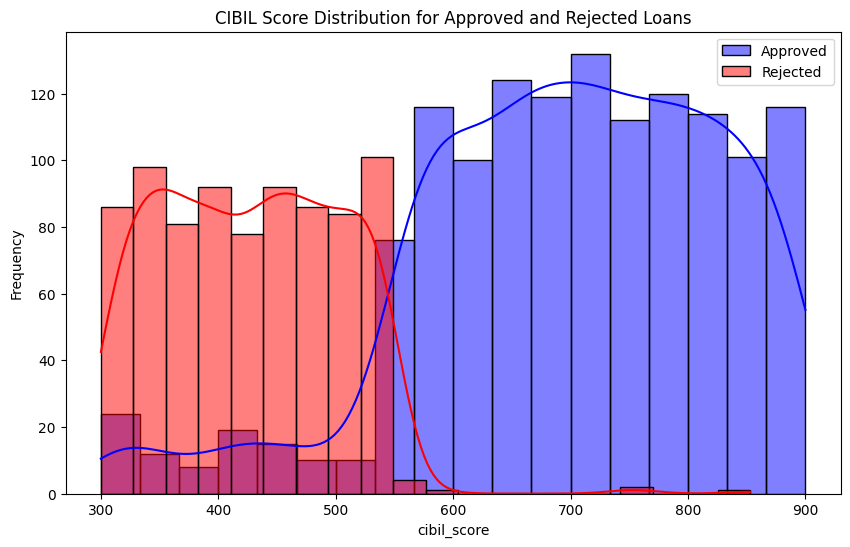

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['loan_status'] == 'Approved']['cibil_score'], color='blue', label='Approved', kde=True)
sns.histplot(df[df['loan_status'] == 'Rejected']['cibil_score'], color='red', label='Rejected', kde=True)
plt.xlabel('cibil_score')
plt.ylabel('Frequency')
plt.title('CIBIL Score Distribution for Approved and Rejected Loans')
plt.legend()
plt.show()

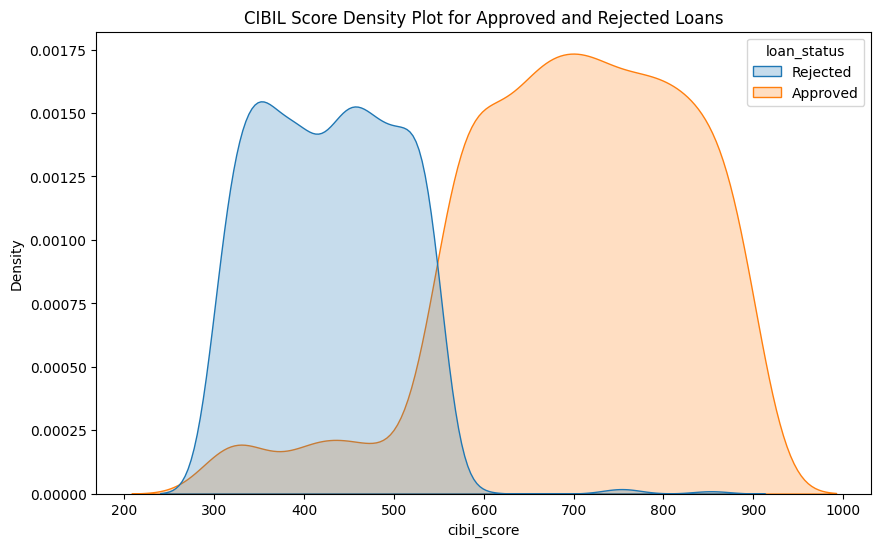

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='cibil_score', hue='loan_status', fill=True)
plt.xlabel('cibil_score')
plt.title('CIBIL Score Density Plot for Approved and Rejected Loans')
plt.show()

<ipython-input-27-87bbb1c9c717>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='loan_status', y='cibil_score', palette='Set2')


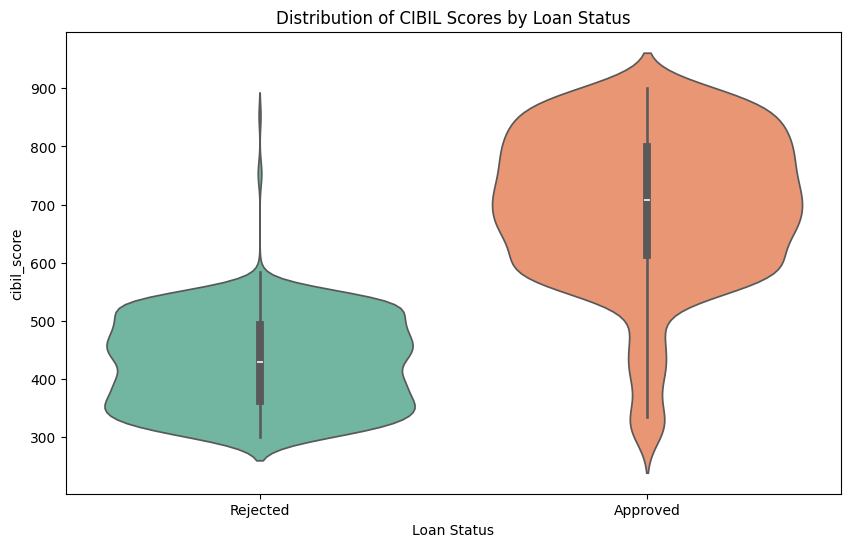

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='loan_status', y='cibil_score', palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('cibil_score')
plt.title('Distribution of CIBIL Scores by Loan Status')
plt.show()

NameError: name 'approved_loans' is not defined

<Figure size 800x500 with 0 Axes>

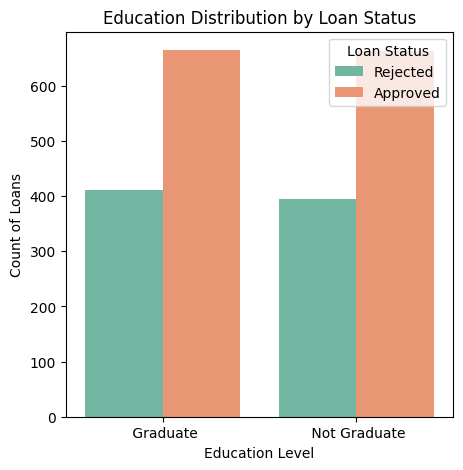

In [33]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='education', hue='loan_status', palette='Set2')
plt.title('Education Distribution by Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


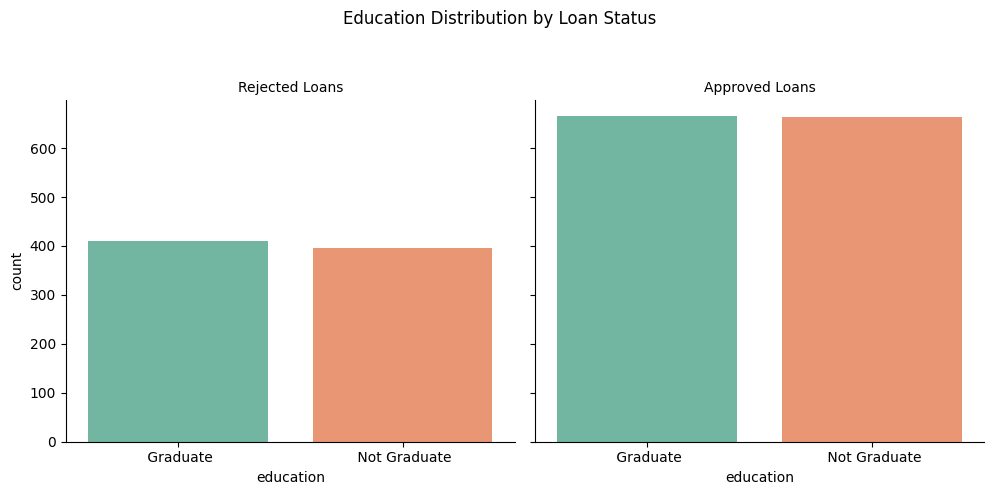

In [31]:
g = sns.FacetGrid(df, col='loan_status', height=5, aspect=1)
g.map(sns.countplot, 'education', order=df['education'].value_counts().index, palette='Set2')
g.add_legend()
g.set_titles(col_template="{col_name} Loans")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Education Distribution by Loan Status')
plt.show()

<ipython-input-35-9163c5158cd7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='income_annum', data=df, palette='Set2')


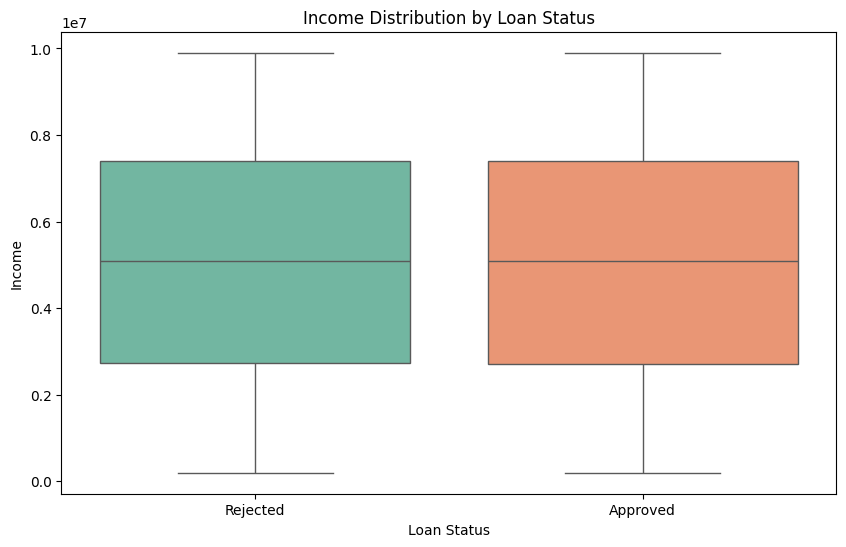

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='income_annum', data=df, palette='Set2')
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.show()

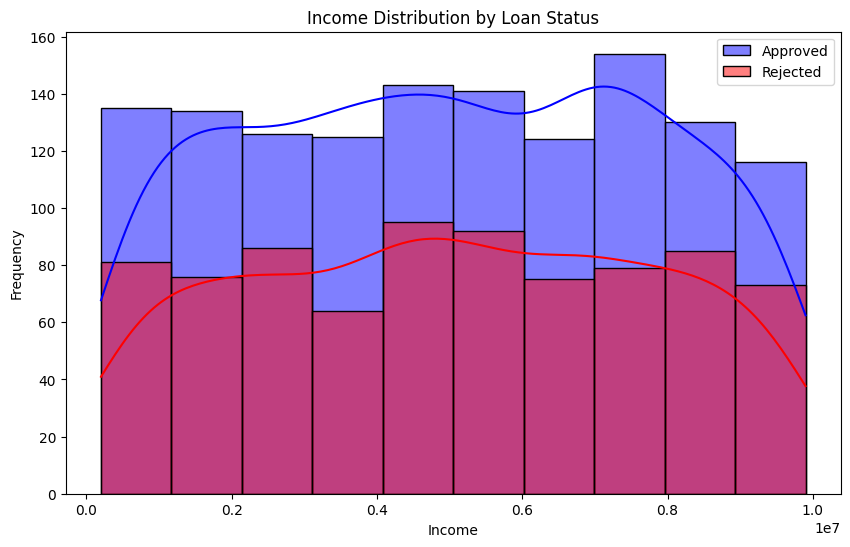

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['loan_status'] == 'Approved']['income_annum'], color='blue', label='Approved', kde=True, bins=10)
sns.histplot(df[df['loan_status'] == 'Rejected']['income_annum'], color='red', label='Rejected', kde=True, bins=10)
plt.title('Income Distribution by Loan Status')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [37]:
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


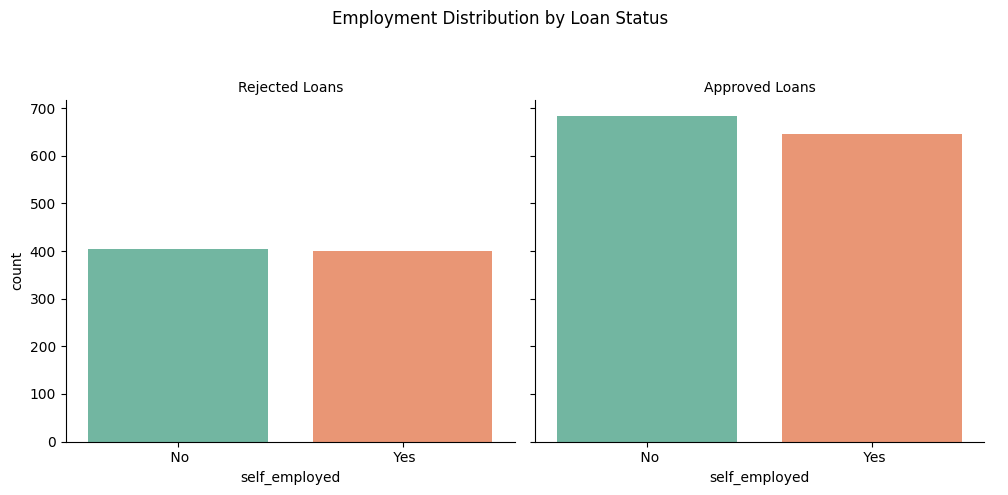

In [38]:
g = sns.FacetGrid(df, col='loan_status', height=5, aspect=1)
g.map(sns.countplot, 'self_employed', order=df['self_employed'].value_counts().index, palette='Set2')
g.add_legend()
g.set_titles(col_template="{col_name} Loans")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Employment Distribution by Loan Status')
plt.show()

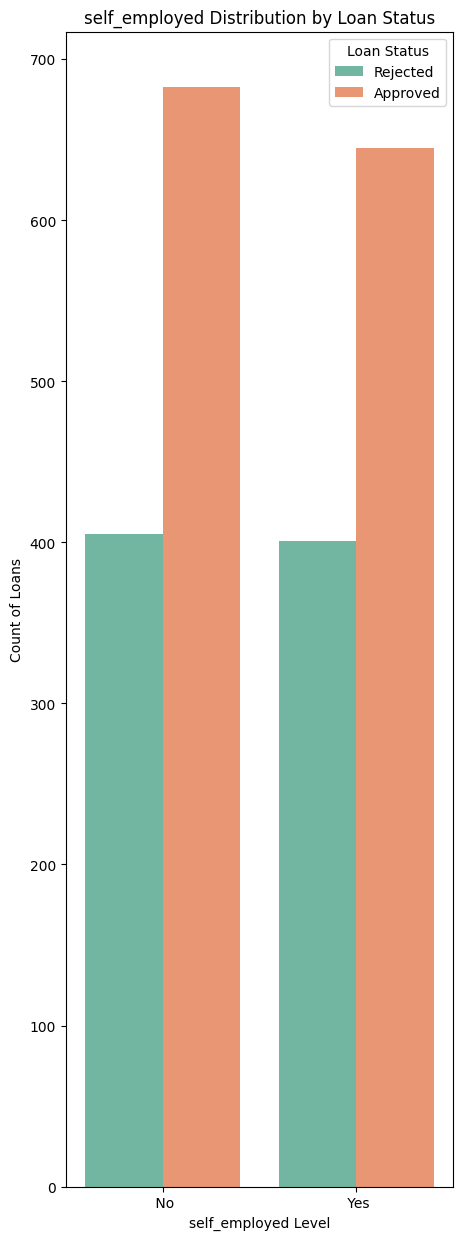

In [42]:
plt.figure(figsize=(5, 15))
sns.countplot(data=df, x='self_employed', hue='loan_status', palette='Set2')
plt.title('self_employed Distribution by Loan Status')
plt.xlabel('self_employed Level')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')
plt.show()

In [43]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved


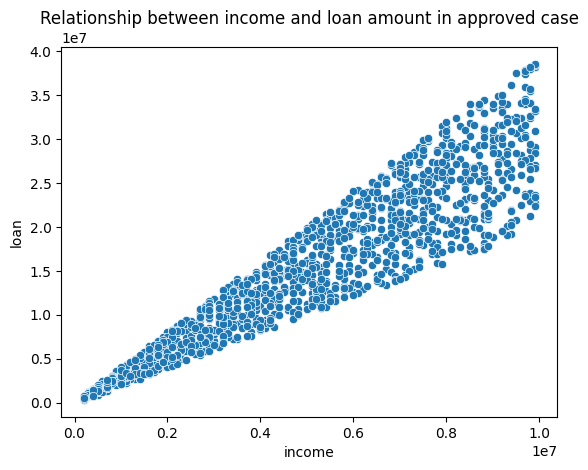

In [44]:
sns.scatterplot(x='income_annum', y='loan_amount', data=new_df)
plt.xlabel('income')  # Đặt tên trục x
plt.ylabel('loan')  # Đặt tên trục y
plt.title('Relationship between income and loan amount in approved case')  # Đặt tiêu đề biểu đồ
plt.show()

In [45]:
disapproved_df = df[df['loan_status'] == 'Rejected']
disapproved_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
6,7,2,Graduate,No,5000000,19400000,12,315,9500000,1600000,18000000,6100000,Rejected
7,8,4,Graduate,Yes,6500000,25700000,18,311,13100000,1700000,19500000,8500000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2128,4,Graduate,No,4800000,12000000,6,441,8400000,1300000,18200000,3200000,Rejected
2128,2129,0,Graduate,No,9700000,27500000,18,343,13400000,16500000,20000000,8200000,Rejected
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected


In [46]:
new2_df = disapproved_df[['income_annum', 'loan_amount', 'loan_status']]
new2_df

,income_annum,loan_amount,loan_status
0,8200000,30700000,Rejected
1,4800000,13500000,Rejected
3,1900000,7400000,Rejected
6,5000000,19400000,Rejected
7,6500000,25700000,Rejected
...,...,...,...
2127,4800000,12000000,Rejected
2128,9700000,27500000,Rejected
2129,4500000,11500000,Rejected
2131,1300000,3000000,Rejected


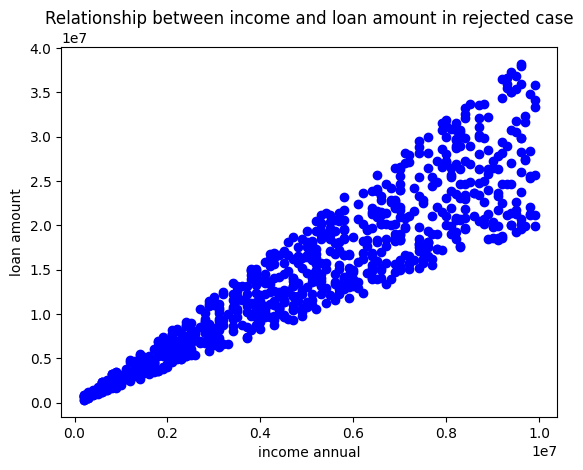

In [47]:
plt.scatter(new2_df['income_annum'], new2_df['loan_amount'], color='blue', marker='o')
plt.xlabel('income annual')  # Đặt tên trục x
plt.ylabel('loan amount')  # Đặt tên trục y
plt.title('Relationship between income and loan amount in rejected case')  # Đặt tiêu đề biểu đồ
plt.show()

In [48]:
new3_df = df[['income_annum', 'loan_amount', 'loan_status']]
new3_df

,income_annum,loan_amount,loan_status
0,8200000,30700000,Rejected
1,4800000,13500000,Rejected
2,9100000,31500000,Approved
3,1900000,7400000,Rejected
4,500000,1600000,Approved
...,...,...,...
2129,4500000,11500000,Rejected
2130,8800000,29300000,Approved
2131,1300000,3000000,Rejected
2132,3300000,11300000,Approved


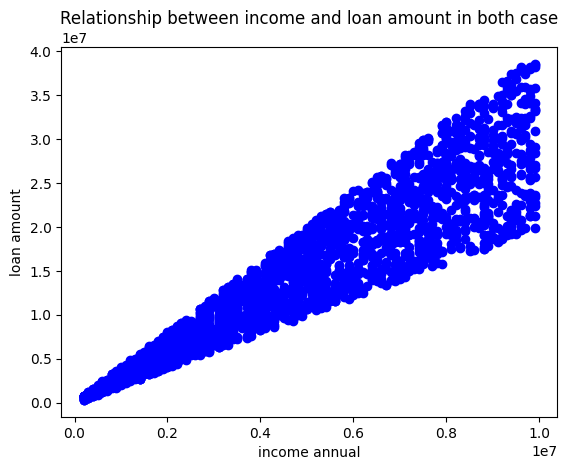

In [50]:
plt.scatter(new3_df['income_annum'], new3_df['loan_amount'], color='blue', marker='o')
plt.xlabel('income annual')  # Đặt tên trục x
plt.ylabel('loan amount')  # Đặt tên trục y
plt.title('Relationship between income and loan amount in both case')  # Đặt tiêu đề biểu đồ
plt.show()

In [51]:
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved


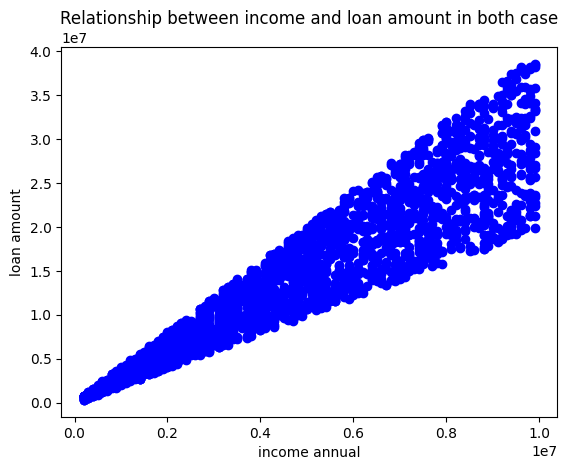

In [52]:
plt.scatter(df['income_annum'], df['loan_amount'], color='blue', marker='o')
plt.xlabel('income annual')  # Đặt tên trục x
plt.ylabel('loan amount')  # Đặt tên trục y
plt.title('Relationship between income and loan amount in both case')  # Đặt tiêu đề biểu đồ
plt.show()

In [53]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved


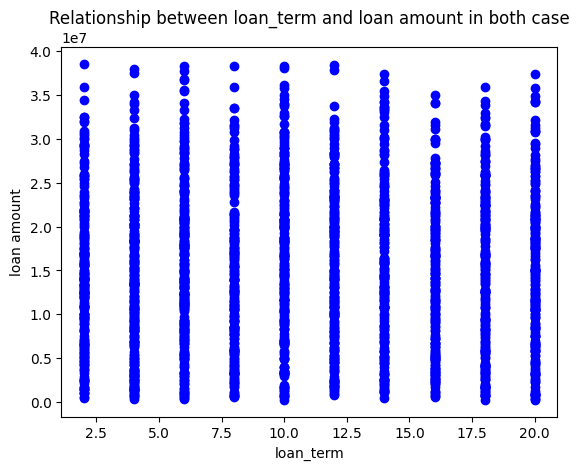

In [54]:
plt.scatter(df['loan_term'], df['loan_amount'], color='blue', marker='o')
plt.xlabel('loan_term')  # Đặt tên trục x
plt.ylabel('loan amount')  # Đặt tên trục y
plt.title('Relationship between loan_term and loan amount in both case')  # Đặt tiêu đề biểu đồ
plt.show()

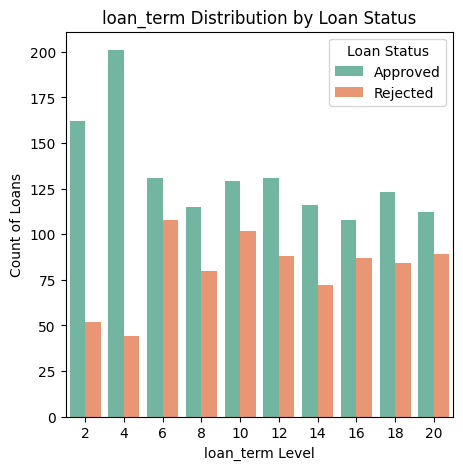

In [56]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='loan_term', hue='loan_status', palette='Set2')
plt.title('loan_term Distribution by Loan Status')
plt.xlabel('loan_term Level')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')
plt.show()

In [58]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved


In [59]:
df['Total_asset'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Total_asset
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,33900000
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved,53300000
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected,10900000
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved,3400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected,37000000
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved,71700000
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected,8400000
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000


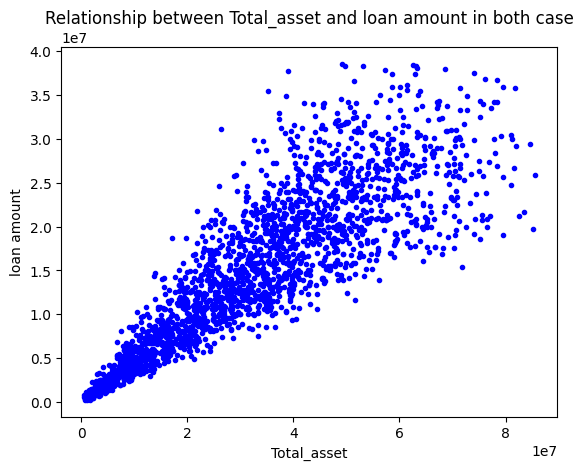

In [60]:
plt.scatter(df['Total_asset'], df['loan_amount'], color='blue', marker='.')
plt.xlabel('Total_asset')  # Đặt tên trục x
plt.ylabel('loan amount')  # Đặt tên trục y
plt.title('Relationship between Total_asset and loan amount in both case')  # Đặt tiêu đề biểu đồ

plt.show()

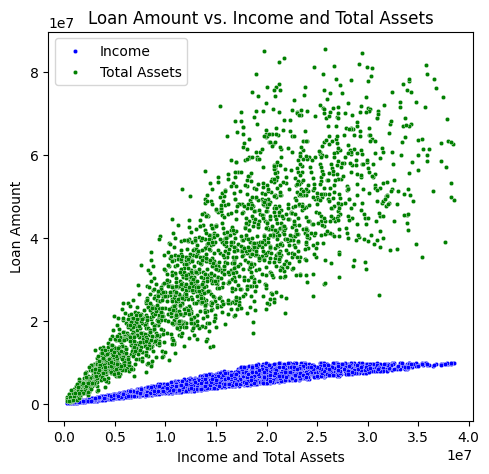

In [67]:
plt.figure(figsize=(5, 5))

# Biểu đồ tán xạ giữa Loan Amount và Income
sns.scatterplot(data=df, x='loan_amount', y='income_annum', color='blue', label='Income', s=10)

# Biểu đồ tán xạ giữa Loan Amount và Total Assets
sns.scatterplot(data=df, x='loan_amount', y='Total_asset', color='green', label='Total Assets', s=10)

# Thêm tiêu đề và nhãn
plt.title('Loan Amount vs. Income and Total Assets')
plt.xlabel('Income and Total Assets')
plt.ylabel('Loan Amount')

# Thêm chú thích
plt.legend()

plt.tight_layout()
plt.show()

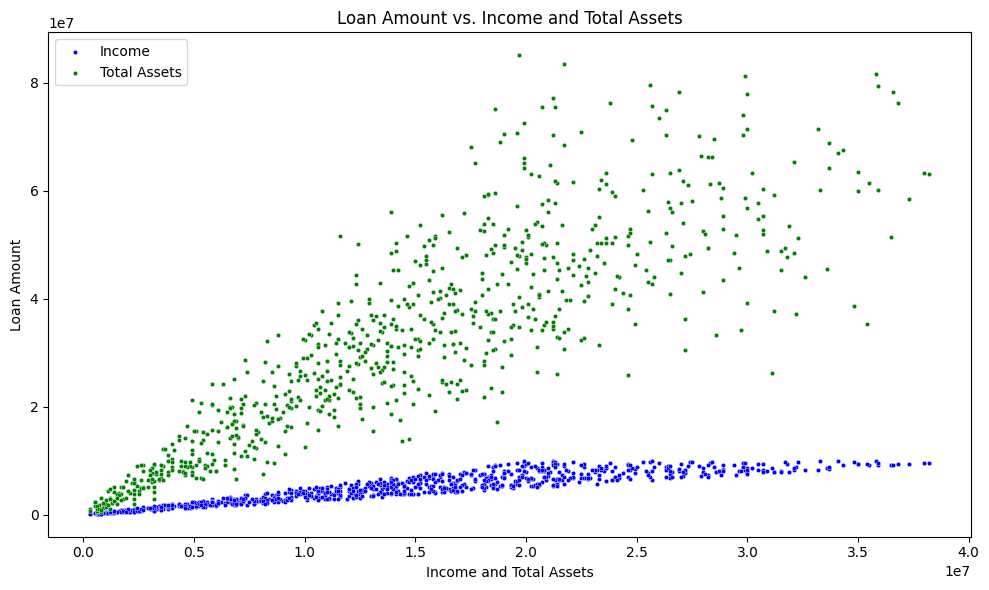

In [64]:
disapproved_df = df[df['loan_status'] == 'Rejected']
disapproved_df

plt.figure(figsize=(10, 6))

# Biểu đồ tán xạ giữa Loan Amount và Income
sns.scatterplot(data=disapproved_df, x='loan_amount', y='income_annum', color='blue', label='Income', s=10)

# Biểu đồ tán xạ giữa Loan Amount và Total Assets
sns.scatterplot(data=disapproved_df, x='loan_amount', y='Total_asset', color='green', label='Total Assets', s=10)

# Thêm tiêu đề và nhãn
plt.title('Loan Amount vs. Income and Total Assets')
plt.xlabel('Income and Total Assets')
plt.ylabel('Loan Amount')

# Thêm chú thích
plt.legend()

plt.tight_layout()
plt.show()

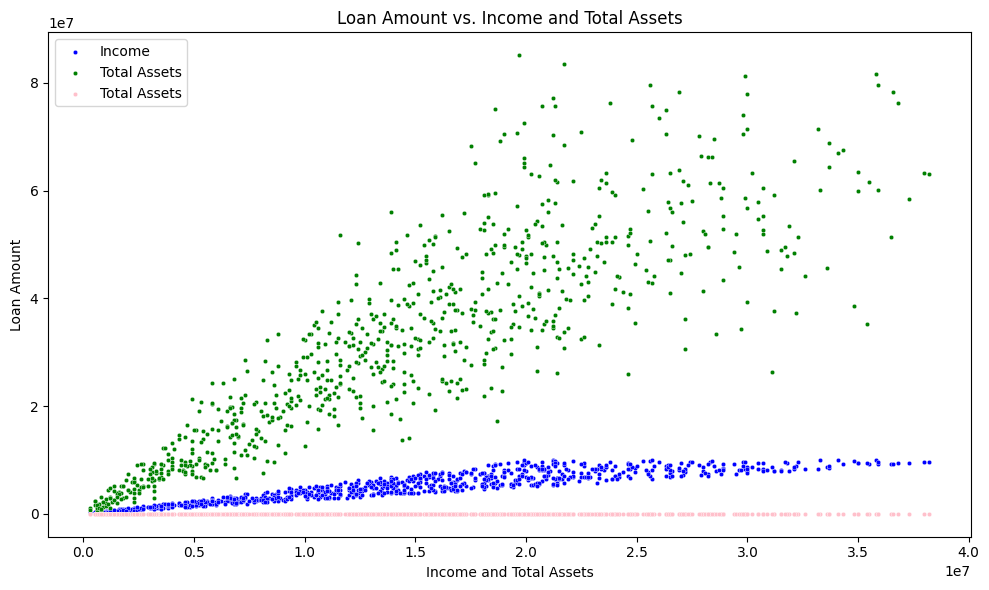

In [93]:
approved_df = df[df['loan_status'] == 'Rejected']
approved_df

plt.figure(figsize=(10, 6))

# Biểu đồ tán xạ giữa Loan Amount và Income
sns.scatterplot(data=approved_df, x='loan_amount', y='income_annum', color='blue', label='Income', s=10)

# Biểu đồ tán xạ giữa Loan Amount và Total Assets
sns.scatterplot(data=approved_df, x='loan_amount', y='Total_asset', color='green', label='Total Assets', s=10)
# Biểu đồ tán xạ giữa Loan Amount và cibil
sns.scatterplot(data=approved_df, x='loan_amount', y='cibil_score', color='pink', label='Total Assets', s=10)
# Thêm tiêu đề và nhãn
plt.title('Loan Amount vs. Income and Total Assets')
plt.xlabel('Income and Total Assets')
plt.ylabel('Loan Amount')

# Thêm chú thích
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
correlation = disapproved_df['loan_amount'].corr( disapproved_df['income_annum'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.9215749472304716


In [75]:
correlation = approved_df['Total_asset'].corr(approved_df['loan_amount'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.8604853812418907


In [76]:
correlation = approved_df['Total_asset'].corr(approved_df['income_annum'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.9282250033096868


In [92]:
import pandas as pd
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (y)
X = df[['income_annum', 'cibil_score']]
y = df['loan_amount']

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Access R^2 value
r_squared = model.rsquared
print(f'R-squared: {r_squared}')

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     6620.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:37:08   Log-Likelihood:                -35067.
No. Observations:                2134   AIC:                         7.014e+04
Df Residuals:                    2131   BIC:                         7.016e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.073e+04   2.89e+05     -0.279   

In [79]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Total_asset
0,1,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
1,2,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,33900000
2,3,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved,53300000
3,4,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected,10900000
4,5,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved,3400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2130,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected,37000000
2130,2131,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved,71700000
2131,2132,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected,8400000
2132,2133,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000


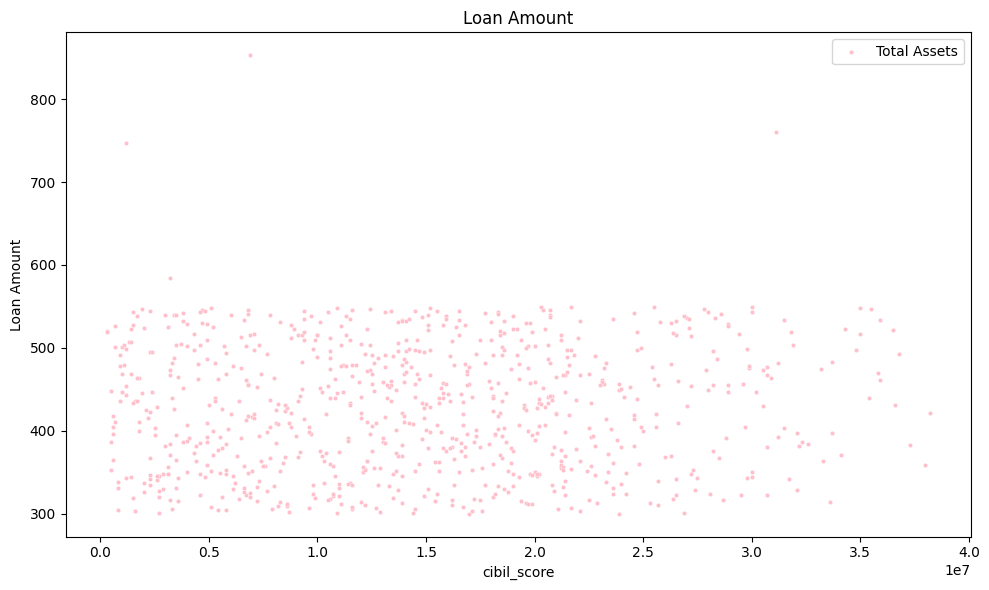

In [95]:
approved_df = df[df['loan_status'] == 'Rejected']
approved_df

plt.figure(figsize=(10, 6))


# Biểu đồ tán xạ giữa Loan Amount và cibil
sns.scatterplot(data=approved_df, x='loan_amount', y='cibil_score', color='pink', label='Total Assets', s=10)
# Thêm tiêu đề và nhãn
plt.title('Loan Amount')
plt.xlabel('cibil_score')
plt.ylabel('Loan Amount')

# Thêm chú thích
plt.legend()

plt.tight_layout()
plt.show()